In [58]:
import pandas as pd
import numpy as np
import sklearn as sk
import plotly as pll
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df = pd.read_csv("/Users/sofietosti/Desktop/DM Exam/clean_data.csv", sep=',', header=0)

In [2]:
df.head()

,index,date,year,manner_of_death,armed,age,gender,race,city,state,state_ID,signs_of_mental_illness,threat_level,flee,flee_encoded,body_camera,longitude,latitude
0,0,2015-01-02,2015,0,1,53,1,0,Shelton,WA,47,True,attack,Not fleeing,0,False,-123.122,47.247
1,1,2015-01-02,2015,0,1,47,1,5,Aloha,OR,37,False,attack,Not fleeing,0,False,-122.892,45.487
2,2,2015-01-03,2015,1,0,23,1,2,Wichita,KS,16,False,other,Not fleeing,0,False,-97.281,37.695
3,3,2015-01-04,2015,0,1,32,1,5,San Francisco,CA,4,True,attack,Not fleeing,0,False,-122.422,37.763
4,4,2015-01-04,2015,0,1,39,1,2,Evans,CO,5,False,attack,Not fleeing,0,False,-104.692,40.384


Total females 236
Total males 4796


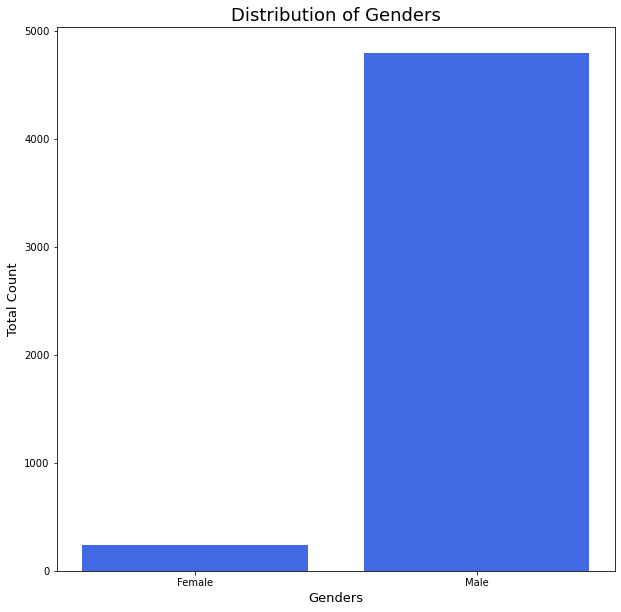

In [87]:
"""
Distribution of genders related to fatal police shootings
"""

gender_df = df[['gender']].copy()
genderList = gender_df['gender'].tolist()

stateDict = {}
tempList = []

femaleCount = 0
maleCount = 0

for s in genderList:
    if s == 1:
        maleCount+=1
    else:
        femaleCount+=1
        
print("Total females", femaleCount)
print("Total males", maleCount)

import matplotlib.pyplot as plt

plt.figure(figsize =(10, 10))
Gender = ['Female','Male']
Total_count = [236,4796]

plt.bar(Gender, Total_count, color='royalblue')
plt.title('Distribution of Genders', fontsize=18, color='black')
plt.xlabel('Genders', fontsize=13, color='black')
plt.ylabel('Total Count', fontsize=13, color='black')
plt.show()

<AxesSubplot:title={'center':'Development in average age over time'}, xlabel='year', ylabel='Average age'>

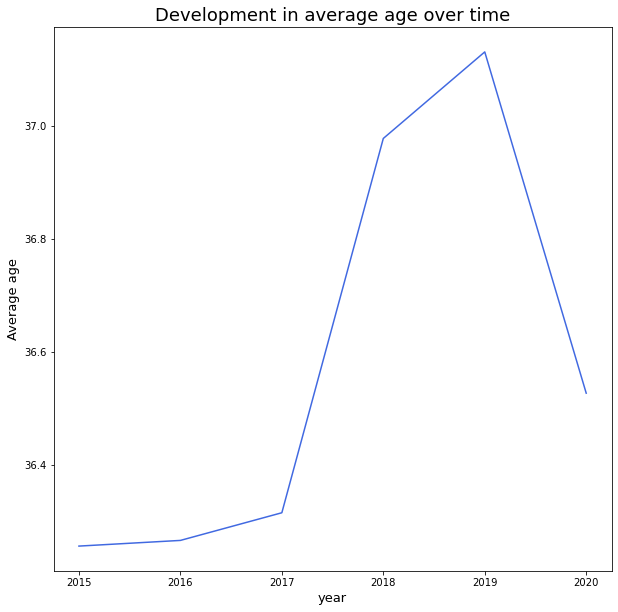

In [102]:
plt.figure(figsize =(10, 10))
plt.title('Development in average age over time', fontsize=18, color='black')
plt.xlabel('Year', fontsize=13, color='black')
plt.ylabel('Average age', fontsize=13, color='black')
df.groupby('year').age.mean().plot(color='royalblue')

signs_of_mental_illness
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

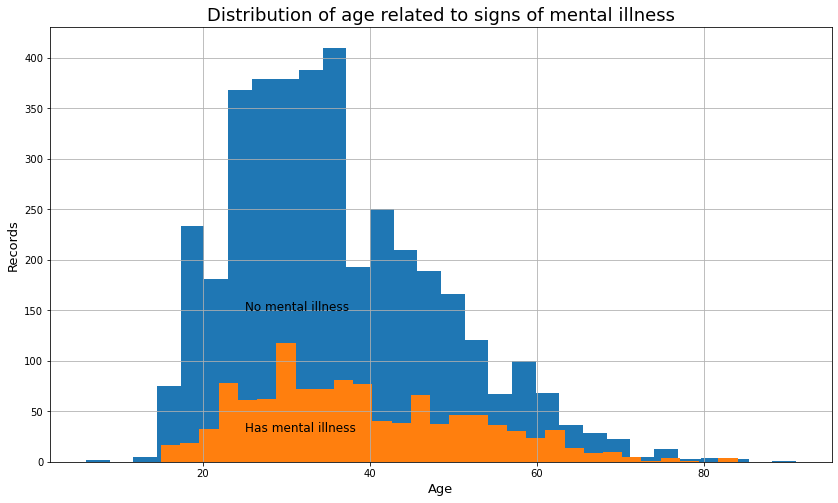

In [149]:
plt.figure(figsize =(14, 8))
plt.title('Distribution of age related to signs of mental illness', fontsize=18, color='black')
plt.xlabel('Age', fontsize=13, color='black')
plt.ylabel('Records', fontsize=13, color='black')

plt.text(25, 150, 'No mental illness', fontsize=12)
plt.text(25, 30, 'Has mental illness', fontsize=12)

df.groupby('signs_of_mental_illness').age.hist(bins=30)